In [7]:
import sys  
sys.path.append("..")

%load_ext autoreload
%autoreload 2

from src.data_loader import BrentDataLoader
from src.time_series_analysis import TimeSeriesAnalyzer
from src.event_compiler import EventCompiler

# Load data
loader = BrentDataLoader("../data/raw/BrentOilPrices.csv")
df = loader.load()

print(f"✓ Loaded {len(df):,} observations from {df['Date'].min().date()} to {df['Date'].max().date()}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
⚠️ Warning: 162 gaps >3 days detected
✓ Loaded 9,011 observations from 1987-05-20 to 2022-11-14


In [8]:
# Analyze time series properties
analyzer = TimeSeriesAnalyzer(df)
log_returns = analyzer.compute_log_returns()
price_adf, returns_adf = analyzer.analyze_stationarity()

print(price_adf['interpretation'])
print(returns_adf['interpretation'])


Raw Prices is NON-STATIONARY (p=0.2893)
Log Returns is STATIONARY (p=0.0000)


✓ Plot saved to: ../docs/eda_volatility.png


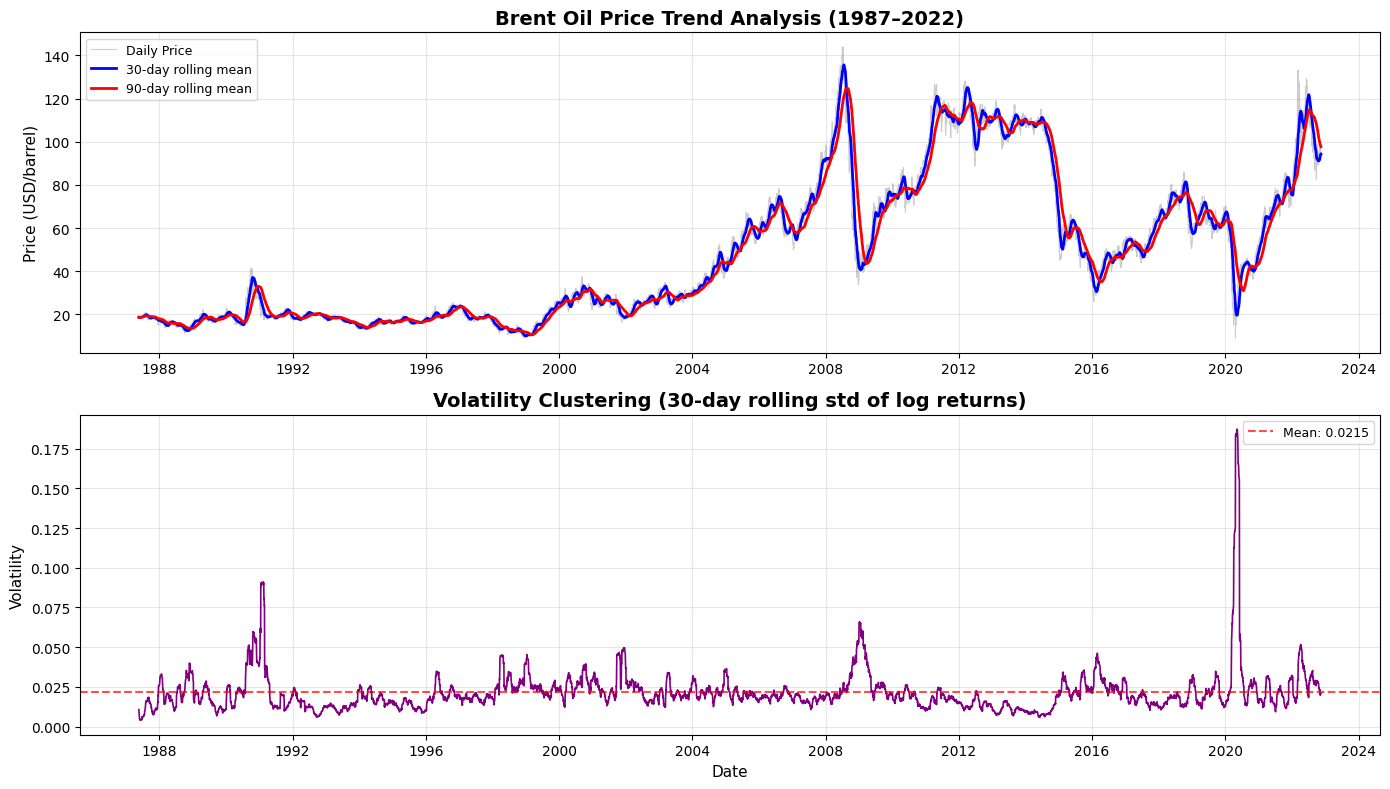

In [9]:
# Visualize
analyzer.plot_trend_and_volatility(save_path="../docs/eda_volatility.png")


In [10]:
# Load events
events = EventCompiler("../data/raw/events.csv").load()
print(f"Loaded {len(events)} curated events")

✅ Loaded 15 events from 2012-06-23 to 2022-10-05
Loaded 15 curated events
